## **Modul 2: Data Analysis - Inferential Statistics**

### **Latihan Uji Statistik**

In [101]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [102]:
df_car = pd.read_csv('all_cars.csv')
df_car.head()

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [103]:
df_car['brand'].value_counts()

brand
Audi       10668
Toyota      6738
Hyundai     4860
Name: count, dtype: int64

1. Apakah data pada kolom price berdasarkan brand Audi, Toyota, Hyundai terdistribusi normal atau tidak? Buktikan dengan Uji Normalitas!

c:\Users\Vincent\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Brand Audi tidak terdistribusi normal dengan Pvalue = 0.0
Brand Hyundai tidak terdistribusi normal dengan Pvalue = 0.0
Brand Toyota tidak terdistribusi normal dengan Pvalue = 0.0


c:\Users\Vincent\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


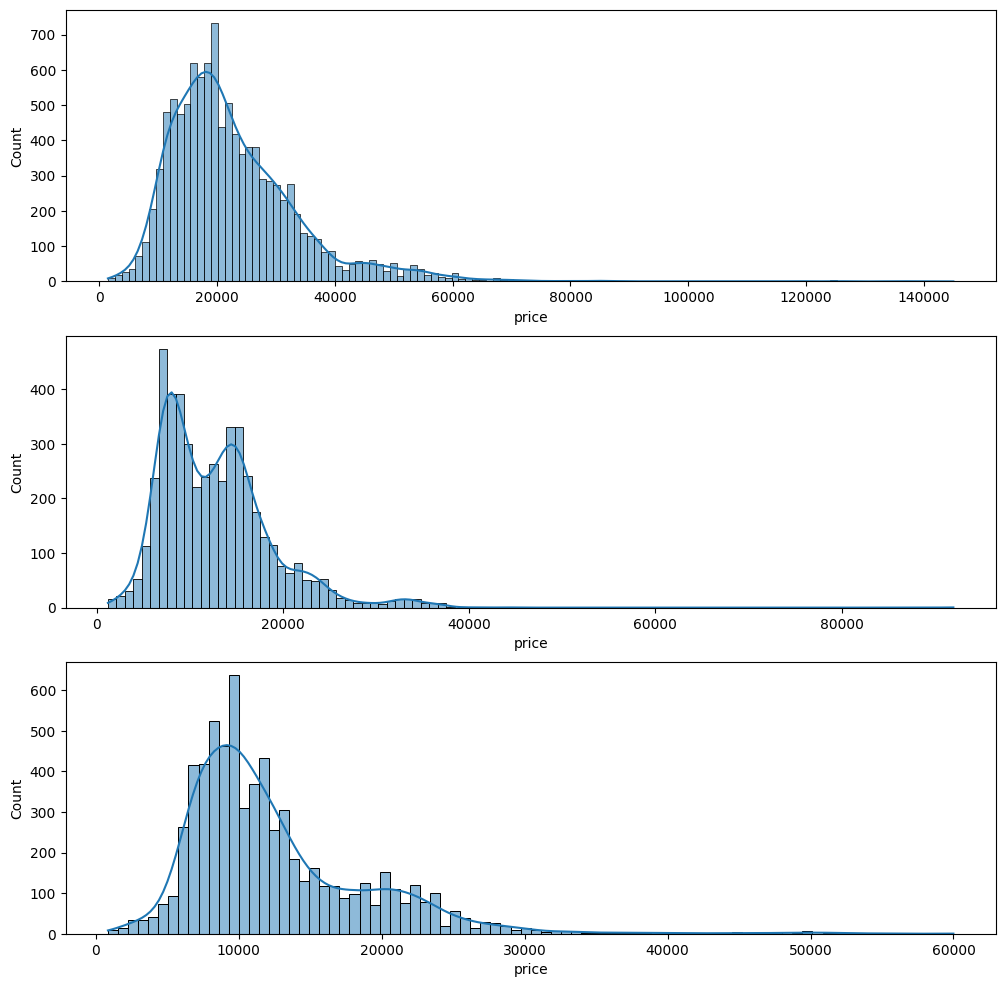

In [104]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(12, 12))
b=0
for brand in df_car['brand'].unique():
    sh = shapiro(df_car[df_car['brand']==brand]['price'])
    if sh[1]>=0.05:
        print(f'Brand {brand} terdistribusi normal dengan Pvalue = {sh[1]}')
    else:
        print(f'Brand {brand} tidak terdistribusi normal dengan Pvalue = {sh[1]}')
    sns.histplot(data=df_car[df_car['brand']==brand]['price'], kde=True, ax=axs[b])
    b+=1

2. Bagaimana hubungan antar variabel numerikal di dataset all_cars ini? Variabel mana yang
hubungannya paling kuat? Buktikan dengan Uji Statistik!

In [105]:
df_pearson = df_car.corr(numeric_only=True,method='pearson')

df_pearson2 = pd.DataFrame(np.where(df_pearson==1,0,df_pearson))
df_pearson2 = df_pearson2.abs()

numeric_index = {}
nd = 0
for num in df_pearson.columns:
    numeric_index[nd] = num
    nd+=1
df_pearson2.rename(index=numeric_index,columns=numeric_index,inplace=True)

label2 = df_pearson2.columns[df_pearson2.isin([df_pearson2.max().max()]).any()]

print(f'Hubungan antara {label2[0]} & {label2[1]} adalah yang terkuat dengan nilai {df_pearson2.max().max()}')
df_pearson


Hubungan antara year & mileage adalah yang terkuat dengan nilai 0.750590889415613


,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.485282,-0.750591,0.199393,-0.213283,-0.013248
price,0.485282,1.000000,-0.381781,0.331584,-0.458494,0.679662
mileage,-0.750591,-0.381781,1.000000,-0.173179,0.213710,0.126746
tax,0.199393,0.331584,-0.173179,1.000000,-0.551931,0.322920
mpg,-0.213283,-0.458494,0.213710,-0.551931,1.000000,-0.331834
engineSize,-0.013248,0.679662,0.126746,0.322920,-0.331834,1.000000


3. Buat sebuah dataframe berisi mobil Hyundai dan Toyota tahun 2019! Dari dataframe yang telah dibuat, lakukan uji hipotesis untuk membuktikan apakah brand mobil ada kaitannya dengan jenis transmisi!

In [106]:
brand3 = ['Hyundai','Toyota']
df_HT19 = df_car[(df_car['year']==2019)&((df_car['brand']==brand3[0])|(df_car['brand']==brand3[1]))]
df_HT19


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10681,Hyundai,Tucson,2019,17750,Manual,10000,Petrol,150,34.9,1.6
10704,Hyundai,Tucson,2019,18000,Manual,4353,Petrol,145,35.3,1.6
10708,Hyundai,I30,2019,14500,Manual,2481,Petrol,145,41.5,0.0
10726,Hyundai,I10,2019,8600,Manual,4920,Petrol,145,60.1,1.0
10730,Hyundai,Tucson,2019,15000,Manual,22397,Petrol,150,34.9,0.0
...,...,...,...,...,...,...,...,...,...,...
22246,Toyota,Camry,2019,26491,Automatic,4416,Hybrid,135,52.3,2.5
22247,Toyota,Camry,2019,27550,Automatic,4189,Hybrid,135,52.3,2.5
22248,Toyota,Camry,2019,25490,Automatic,6340,Hybrid,135,52.3,2.5
22249,Toyota,Camry,2019,26990,Automatic,3000,Hybrid,135,52.3,2.5


In [107]:
df_pv_HT19 = df_HT19[['brand','transmission']].pivot_table('transmission','brand','transmission',len)
df_pv_HT19


transmission,Automatic,Manual,Semi-Auto
brand,,,
Hyundai,185,695,206
Toyota,470,764,52


array([<Axes: ylabel='Automatic'>, <Axes: ylabel='Manual'>,
       <Axes: ylabel='Semi-Auto'>], dtype=object)

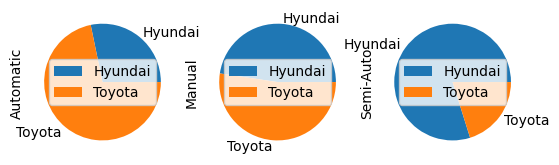

In [108]:
df_pv_HT19.plot(kind='pie',subplots=True)

In [109]:
from scipy.stats import chi2_contingency
chi3 = chi2_contingency(df_pv_HT19)

# if 0<chi3[1]<=0.3:
#     print(f'{brand3[0]} Transmission & {brand3[1]} Transmission in 2019 has weak correlation with Pvalue = {chi3[1]}')
# elif 0.3<chi3[1]<=0.7:
#     print(f'{brand3[0]} Transmission & {brand3[1]} Transmission in 2019 has medium correlation with Pvalue = {chi3[1]}')
# else:
#     print(f'{brand3[0]} Transmission & {brand3[1]} Transmission in 2019 has strong correlation with Pvalue = {chi3[1]}')

chi3
print(f'Kedua variable Ha: kedua variable berkaitan bukan ho: kedua variabel tidak berkaitan dengan Pvalue = {chi3[1]}')

Kedua variable Ha: kedua variable berkaitan bukan ho: kedua variabel tidak berkaitan dengan Pvalue = 5.623815000905951e-45


4. Apakah 50% dari seluruh mobil yang dijual menggunakan bahan bakar Petrol? Buktikan dengan uji statistik!

In [110]:
df_car['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Other'], dtype=object)

In [111]:
ha4 = df_car['fuelType'].value_counts()['Petrol']/len(df_car['fuelType'])
ha4

0.5412736908290667

In [112]:
from statsmodels.stats.proportion import proportions_ztest
alpha4 = 0.05
ho4 = 0.5
Z_test4 = proportions_ztest(count = df_car['fuelType'].value_counts()['Petrol'],
                            nobs = len(df_car['fuelType']), value = ho4)
if Z_test4[1]<=alpha4:
    print(f'Berdasarkan Uji Proposi Z-Test dengan alpha {alpha4} terbukti bahwa 50% dari seluruh mobil yang dijual\ntidak menggunakan bahan bakar Petrol dengan nilai Pvalue {Z_test4[1]}')
else:
    print(f'Berdasarkan Uji Proposi Z-Test dengan alpha {alpha4} terbukti bahwa 50% dari seluruh mobil yang dijual\nmenggunakan bahan bakar Petrol dengan nilai Pvalue {Z_test4[1]}')


Berdasarkan Uji Proposi Z-Test dengan alpha 0.05 terbukti bahwa 50% dari seluruh mobil yang dijual
tidak menggunakan bahan bakar Petrol dengan nilai Pvalue 4.3158227056675195e-35


### **Referensi buku statistika:**

- Statistics The Art and Science of Learning from Data (Agresti et al., 2018)
- Businees Statistics for Contemporary Decision Making (Black, 2012)
- Practical Statistics for Data Scientist (Bruce & Bruce, 2017)